https://www.kaggle.com/datasets/msambare/fer2013

* FER-2013


The data consists of 48x48 pixel grayscale images of faces. The faces have been automatically registered so that the face is more or less centred and occupies about the same amount of space in each image.

The task is to categorize each face based on the emotion shown in the facial expression into one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The training set consists of 28,709 examples and the public test set consists of 3,589 examples.

In [ ]:
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
glob("images/train/*")

['images/train/happy',
 'images/train/sad',
 'images/train/fear',
 'images/train/surprise',
 'images/train/neutral',
 'images/train/angry',
 'images/train/disgust']

In [3]:
glob("images/train/happy/*")[:5]

['images/train/happy/Training_50449107.jpg',
 'images/train/happy/Training_70433018.jpg',
 'images/train/happy/Training_85610005.jpg',
 'images/train/happy/Training_4460748.jpg',
 'images/train/happy/Training_6312930.jpg']

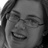

In [4]:
tf.keras.preprocessing.image.load_img('images/train/happy/Training_10019449.jpg')

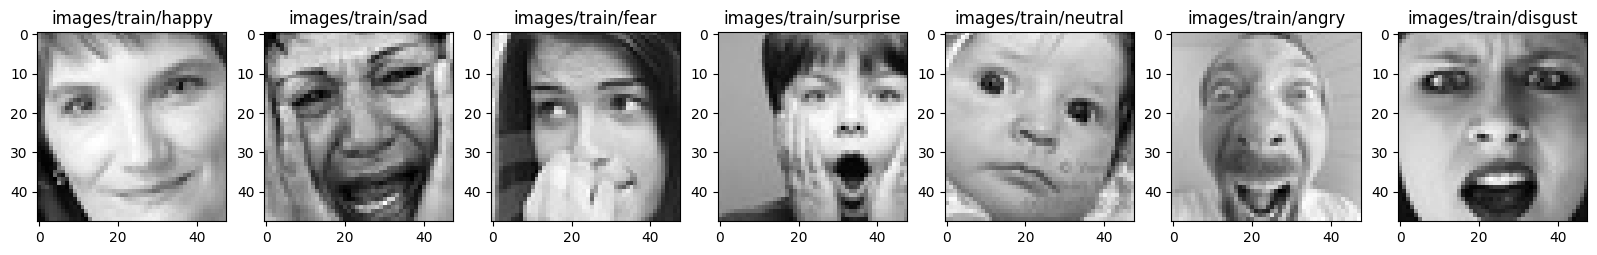

In [5]:
emotion_folder = glob("images/train/*")

fig, axes = plt.subplots(1, len(emotion_folder), figsize=(20, 4))
for i, emotion in enumerate(emotion_folder):
    img_path = glob(f"{emotion}/*")[0]
    img = plt.imread(glob(f"{emotion}/*")[0])
    axes[i].imshow(img, cmap="gray")
    axes[i].set_title(emotion)

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# rotation_range: Degree range for random rotations
# zoom_range : Float or [lower, upper]. 
#      Range for random zoom. If a float, [lower, upper] = [1-zoom_range, 1+zoom_range]
# horizontal_flip : Randomly flip inputs horizontally
# rescale : Rescaling by 1/255 to normalize
train_generator = ImageDataGenerator(rotation_range=10,  
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     rescale=1/255)
train_generator 

In [7]:
train_dataset = train_generator.flow_from_directory(directory='images/train',
                                                    target_size=(48, 48),  
                                                    class_mode='categorical',
                                                    batch_size=16,  
                                                    shuffle=True,
                                                    seed=42) 

Found 28709 images belonging to 7 classes.


In [8]:
train_dataset.classes

array([0, 0, 0, ..., 6, 6, 6], dtype=int32)

In [9]:
train_dataset.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [10]:
np.unique(train_dataset.classes, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6], dtype=int32),
 array([3995,  436, 4097, 7215, 4965, 4830, 3171]))

In [11]:
glob("images/test/*")

['images/test/happy',
 'images/test/sad',
 'images/test/fear',
 'images/test/surprise',
 'images/test/neutral',
 'images/test/angry',
 'images/test/disgust']

In [12]:
# 다른 변환 없이 스케일링만 
test_generator = ImageDataGenerator(rescale=1/255)
test_dataset = test_generator.flow_from_directory(directory='images/test',
                                                  target_size=(48, 48),
                                                  class_mode='categorical',
                                                  batch_size=1,
                                                  shuffle=False,
                                                  seed=42)


Found 7178 images belonging to 7 classes.


In [13]:
train_dataset.class_indices, test_dataset.class_indices

({'angry': 0,
  'disgust': 1,
  'fear': 2,
  'happy': 3,
  'neutral': 4,
  'sad': 5,
  'surprise': 6},
 {'angry': 0,
  'disgust': 1,
  'fear': 2,
  'happy': 3,
  'neutral': 4,
  'sad': 5,
  'surprise': 6})

In [14]:
train_dataset.class_indices == test_dataset.class_indices

True

In [15]:
# input_shape 로 사용할 shape
train_dataset.image_shape

(48, 48, 3)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization

num_classes = 7
num_filters = 32
model = Sequential()

model.add(Conv2D(filters=num_filters, kernel_size=3, activation='relu', padding='same', 
                 input_shape=train_dataset.image_shape))
model.add(BatchNormalization())
model.add(Conv2D(filters=num_filters, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(2*2*2*num_filters, 3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*2*num_filters, 3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(2*2*num_filters, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(2*num_filters, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))